# CSCI 349 Final Project - Data Prep and EDA
**Authors:** Nick Satriano, Jake Etzler, and Jake Luther  
**Date:** April 19th  
**Semester:** Spring 2023  
**Instructor:** Brian King

### Project Summary

We are looking at historical data from the United States Stock Market to see if we can predict the future prices of certain stocks.

### The Data

We are using data from a github repository called **yfinance** which is a python package used for downloading Yahoo! Finance market data. This dataset contains historical data of every stock on the US Stock Market, and we can selectively choose to import data of specific stocks, or pull from different date ranges depending on our needs. Each observation in the data represents a daily observation for each stock. This dataframe has multi-level column names, meaning that the observations for each stock are grouped together on the same row, representing a single date, but all of their attributes are contained in a block of columns under the given stock name. The attributes for each stock on each day are reported in the data as follows: **Date (the index)**, **Open**, **High**, **Low**, **Close**, **Adj Close**, and **Volume**.

### Preprocessing the data

In [19]:
# import list
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from datetime import datetime, timezone

In [20]:
# data preprocessing for the PNM stock ticker
ticker = "PNM"
pnm_raw = yf.download(ticker, start="2010-01-01", end="2023-04-10", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [21]:
# showing the head of the imported PNM stock ticker dataframe
pnm_raw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,12.75,12.95,12.63,12.71,8.673463,714500
2010-01-05,12.76,12.81,12.33,12.50,8.530157,1086400
2010-01-06,12.53,12.68,12.47,12.54,8.557454,688000
2010-01-07,12.51,12.62,12.43,12.52,8.543805,350400
2010-01-08,12.52,12.59,12.44,12.57,8.577926,350500


In [22]:
# showing the info of the imported PNM stock ticker dataframe
pnm_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, 2010-01-04 to 2023-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3338 non-null   float64
 1   High       3338 non-null   float64
 2   Low        3338 non-null   float64
 3   Close      3338 non-null   float64
 4   Adj Close  3338 non-null   float64
 5   Volume     3338 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.5 KB


In [23]:
# making the data into a proper dataframe
pnm = pd.DataFrame(pnm_raw)

### Variables

1) **Open:** this is a floating-point value representing the price of the stock when the market opens on a given day.  
2) **High:** this is a floating-point value representing the highest price of the stock during the given day.  
3) **Low:** this is a floating-point value representing the lowest price of the stock during the given day.  
4) **Close:** this is a floating-point value representing the price of the stock when the market closes on a given day.  
5) **Adj Close:** this is a floating-point value representing the adjusted closing price of the stock on a given day. This is the value of the stock while being adjusted for factors related to corporate actions, such as stock splits, dividends, and rights offerings. This is a much more accurate measure for the true closing value of a stock for the day.  
6) **Volume:** this is an integer value representing the total number of stock that was traded for the day.  

The **yfinance** package does amazing work to pre-process the data during import, we have 3338 entries for the PNM stock ticker, and each variable contains 3338 non-null values. All of the variables are in their correct type and the index is properly represented as a DatetimeIndex.  

The data prep for each stock ticker dataset is mostly left to choosing tickers with a substantial number of timestamps. This will ensure that there is a high volume of data to train and fit our models with, which will ultimately increase the accuracy and predictability of our models. We are specifically choosing to focus on stock tickers that have timestamps with at least a decade of recorded data to work with. However, we will also be testing the validity of our models across multiple date ranges as well. We have a list of about 2000 stock tickers with data which dates back to 2010 that we intend to assess and potentially use for our modeling.

### EDA and summary statistics of the data
You should strive to generate good summary statistics, show what the data looks like, and
include good EDA and visualizations with boxplots, barcharts, density plots for key variables, or
whatever other plots you want that are specific to your data and problem to help the reader
understand basic distributions of important variables. Remember - visualizations can help you
convey general info about your data and are extremely helpful.

In [24]:
# Showing the summary statistics of the PNM dataframe
pnm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3.338000e+03
mean,32.919164,33.197016,32.641600,32.931315,28.720481,6.164460e+05
std,12.573598,12.628167,12.511046,12.572949,13.270701,6.665694e+05
min,11.010000,11.140000,10.810000,10.940000,7.619684,1.024000e+05
25%,22.322500,22.570000,22.122500,22.360001,17.192059,3.716250e+05
50%,33.025000,33.390001,32.764999,33.080000,27.631361,5.154000e+05
75%,45.297501,45.660000,44.950001,45.312500,42.543434,7.155750e+05
max,55.959999,56.139999,55.770000,55.790001,51.256645,2.487620e+07


Text(0.5, 1.0, 'Scatterplot of the Open price of PNM over time')

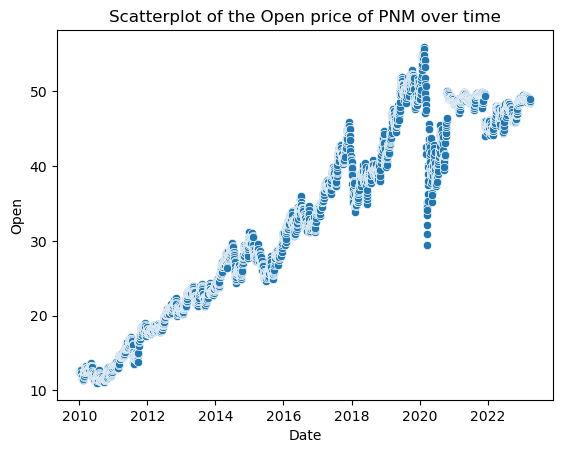

In [25]:
# creating a scatterplot of the Open variable
sns.scatterplot(data = pnm, x = pnm.index, y = pnm["Open"])
plt.title("Scatterplot of the Open price of PNM over time")

<Axes: title={'center': 'Scatterplot of the Adj Close price of PNM over time'}, xlabel='Date', ylabel='Adj Close'>

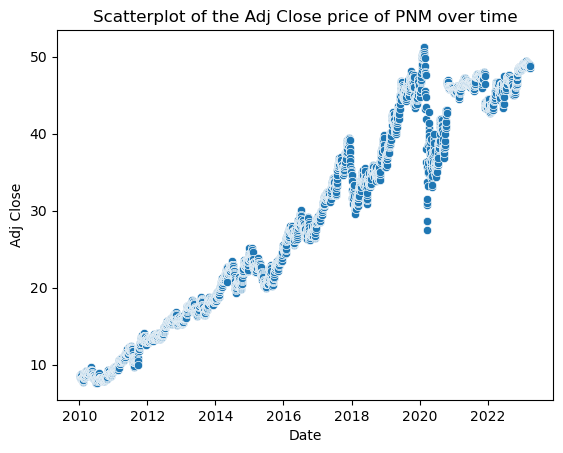

In [26]:
# creating a scatterplot of the Adj Close Variable
plt.title("Scatterplot of the Adj Close price of PNM over time")
sns.scatterplot(data = pnm, x = pnm.index, y = pnm["Adj Close"])

The **Open** and **Adj Close** variables have a very similar scatterplot shape, which is what we expect, as the closing prices and following day's opening prices should be the same or very similar.

Text(0.5, 1.0, 'Initial Boxplot of the Volume variable')

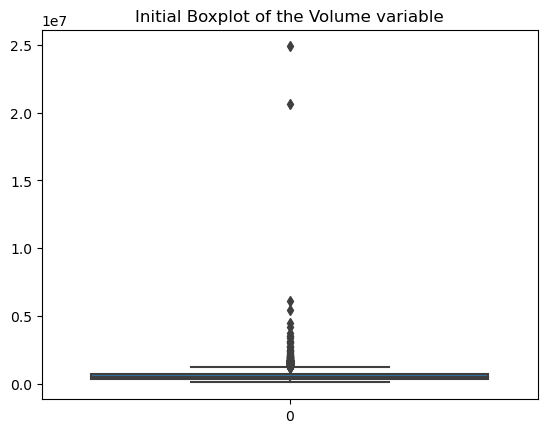

In [27]:
# creating a boxplot of the Volume variable
sns.boxplot(data = pnm["Volume"])
plt.title("Initial Boxplot of the Volume variable")

There are a lot of outliers in the Volume data that compress the boxplot. We're going to identify these outliers:

In [28]:
# finding high and low outliers for the Volume variable
stats = pnm.describe()
high = stats.loc['75%', "Volume"]
low = stats.loc['25%', "Volume"]

# Finding the interquartile range for the Volume variable
IQR = high - low

# finding the minimum and maximum threshold for outliers in the Volume variable
min_out = low - 1.5 * IQR
max_out = high + 1.5 * IQR

print("The minimum threshold for Volume outliers is:", min_out)
print("The maximum threshold for Volume outliers is:", max_out)

The minimum threshold for Volume outliers is: -144300.0
The maximum threshold for Volume outliers is: 1231500.0


In [29]:
# showing the dates where the Volume of trades was an outlier
pnm_vol_out = pnm[(pnm["Volume"] > 1231500) == True]
pnm_vol_out

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-21,12.740000,12.760000,12.350000,12.430000,8.482389,1336300
2010-01-22,12.320000,12.430000,11.920000,11.950000,8.154826,1233400
2010-01-27,11.810000,11.850000,11.550000,11.620000,8.013457,1923700
2010-02-08,11.350000,11.430000,11.270000,11.310000,7.799675,2097800
2010-02-09,11.460000,11.570000,11.230000,11.520000,7.944494,1654400
...,...,...,...,...,...,...
2022-11-10,47.759998,48.169998,47.150002,47.290001,46.936646,1275900
2022-12-16,48.779999,49.070000,48.689999,49.009998,48.643791,1590200
2023-02-01,49.270000,49.419998,49.150002,49.250000,48.882000,1376000


In [30]:
# showing the number of outliers
print("There are", len(pnm_vol_out), "Volume outliers in the data.")

There are 182 Volume outliers in the data.


Text(0.5, 1.0, 'KDE Plot of the Volume outliers')

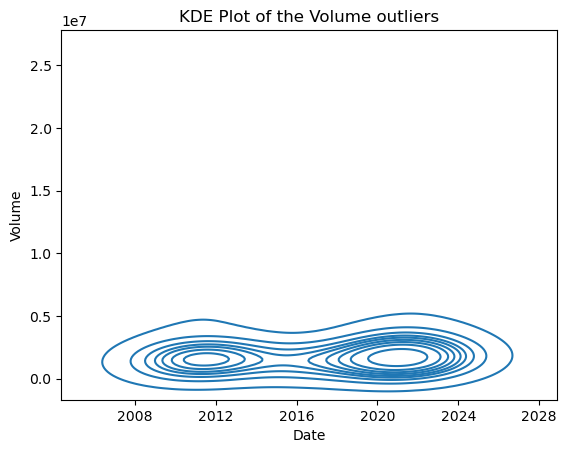

In [31]:
# showing a KDEPlot of the outlier data
sns.kdeplot(data = pnm_vol_out, x = pnm_vol_out.index, y = pnm_vol_out["Volume"])
plt.title("KDE Plot of the Volume outliers")

The KDE Plot above shows the distribution of the observations containing a Volume outlier. From the graph, we can see that kernel density for Volume is centered around two time periods, 2011-2012 and 2020-2022. This means that the high Volume outliers occurred most frequently around those periods.

In [32]:
# removing Volume outlier observations from dataframe, storing as new dataframe named pnm_clean
pnm_clean = pnm[(pnm["Volume"] > 1231500) != True]

Text(0.5, 1.0, 'Boxplot of the cleaned Volume data')

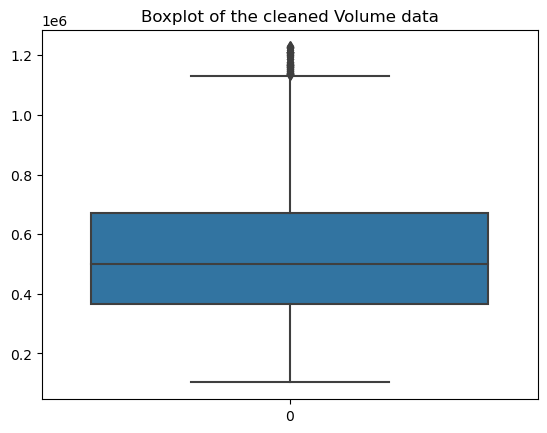

In [33]:
# re-creating the boxplot from before, with the outliers now removed
sns.boxplot(data = pnm_clean["Volume"])
plt.title("Boxplot of the cleaned Volume data")

Above is the boxplot of the Volume variable with the observations containing a Volume outlier are removed. We now can see a much better view of the distribution of the middle 50% of the data. The Volume variable is roughly centered at a median of 500000 trades.

Text(0.5, 1.0, 'KDEPlot of the cleaned Volume data')

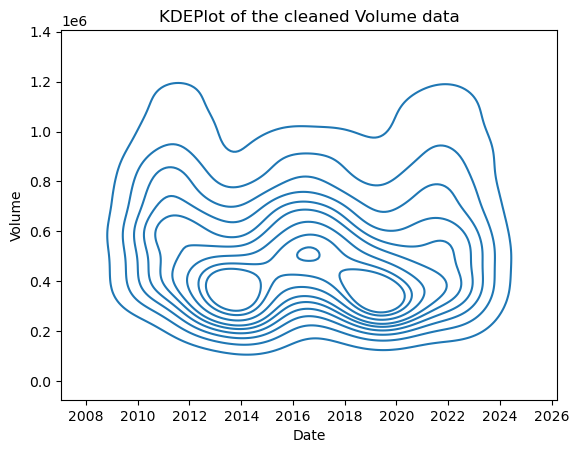

In [34]:
# creating a KDEP plot for the cleaned data
sns.kdeplot(data = pnm_clean, x = pnm_clean.index, y = pnm_clean["Volume"])
plt.title("KDEPlot of the cleaned Volume data")

This KDE Plot shows the kernel density of the cleaned data for the Volume variable over time. We can see that there are two large kernels centering around 2013-2015 and 2018-2020, with a smaller kernel between 2016-2017. This KDE plot does not show us much in the way of the overall trends of the Volume for trading of the PNM stock, considering the data is contained between 2010 and 2023.

### Other variables that we will add and consider using for modeling and analysis

1) **Moving average:** the average price of a stock over a certain period of days (usually a 3 day moving average or greater).  

2) **Relative Strength Index:** compares and measures a stock's strength on days when prices go up to its strength on days when prices go down.  

3) **Moving Average Convergence/Divergence (MACD):** this is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price.  

4) **Bollinger Bands:** bands plotted two standard deviations away from a simple moving average, which can help determine if a stock is overbought or oversold.  

5) **Stochastic Oscillator:** this is an indicator that compares a stock's closing price to its price range over a certain period, which can help identify potential reversals in the price trend.  

6) **On-Balance Volume (OBV):** this is a volume-based indicator that measures the buying and selling pressure on a stock over time.  

7) **Average True Range (ATR):** this is a measure of a stock's volatility, calculated as the average range of price movements over a certain period.  

_citation [1]: https://www.investopedia.com/terms/m/movingaverage.asp_  
_citation [2]: https://www.investopedia.com/terms/r/rsi.asp_  
_citation [3]: https://www.investopedia.com/terms/m/macd.asp_  

In [37]:
# adding 10, 25, 50, 100, and 200 moving-day adjusted-closing price average to the dataframe
pnm['10DayMovAvg'] = pnm["Adj Close"].rolling(window=10).mean()
pnm['25DayMovAvg'] = pnm["Adj Close"].rolling(window=25).mean()
pnm['50DayMovAvg'] = pnm["Adj Close"].rolling(window=50).mean()
pnm['100DayMovAvg'] = pnm["Adj Close"].rolling(window=100).mean()
pnm['200DayMovAvg'] = pnm["Adj Close"].rolling(window=200).mean()
pnm.head(20)

,Open,High,Low,Close,Adj Close,Volume,10DayMovAvg,25DayMovAvg,50DayMovAvg,100DayMovAvg,200DayMovAvg
Date,,,,,,,,,,,
2010-01-04,12.75,12.95,12.63,12.71,8.673463,714500,NaN,NaN,NaN,NaN,NaN
2010-01-05,12.76,12.81,12.33,12.50,8.530157,1086400,NaN,NaN,NaN,NaN,NaN
2010-01-06,12.53,12.68,12.47,12.54,8.557454,688000,NaN,NaN,NaN,NaN,NaN
2010-01-07,12.51,12.62,12.43,12.52,8.543805,350400,NaN,NaN,NaN,NaN,NaN
2010-01-08,12.52,12.59,12.44,12.57,8.577926,350500,NaN,NaN,NaN,NaN,NaN
2010-01-11,12.58,12.67,12.43,12.53,8.550628,497000,NaN,NaN,NaN,NaN,NaN
2010-01-12,12.49,12.49,12.27,12.38,8.448268,965600,NaN,NaN,NaN,NaN,NaN
2010-01-13,12.38,12.60,12.35,12.57,8.577926,318700,NaN,NaN,NaN,NaN,NaN
2010-01-14,12.48,12.65,12.48,12.54,8.557454,606200,NaN,NaN,NaN,NaN,NaN


Above, we added a 10, 25, 50, 100, and 200 day moving average to each of the observations in the dataframe. This will ultimately help us calculate and evaluate different linear trends over time for the same stock ticker.

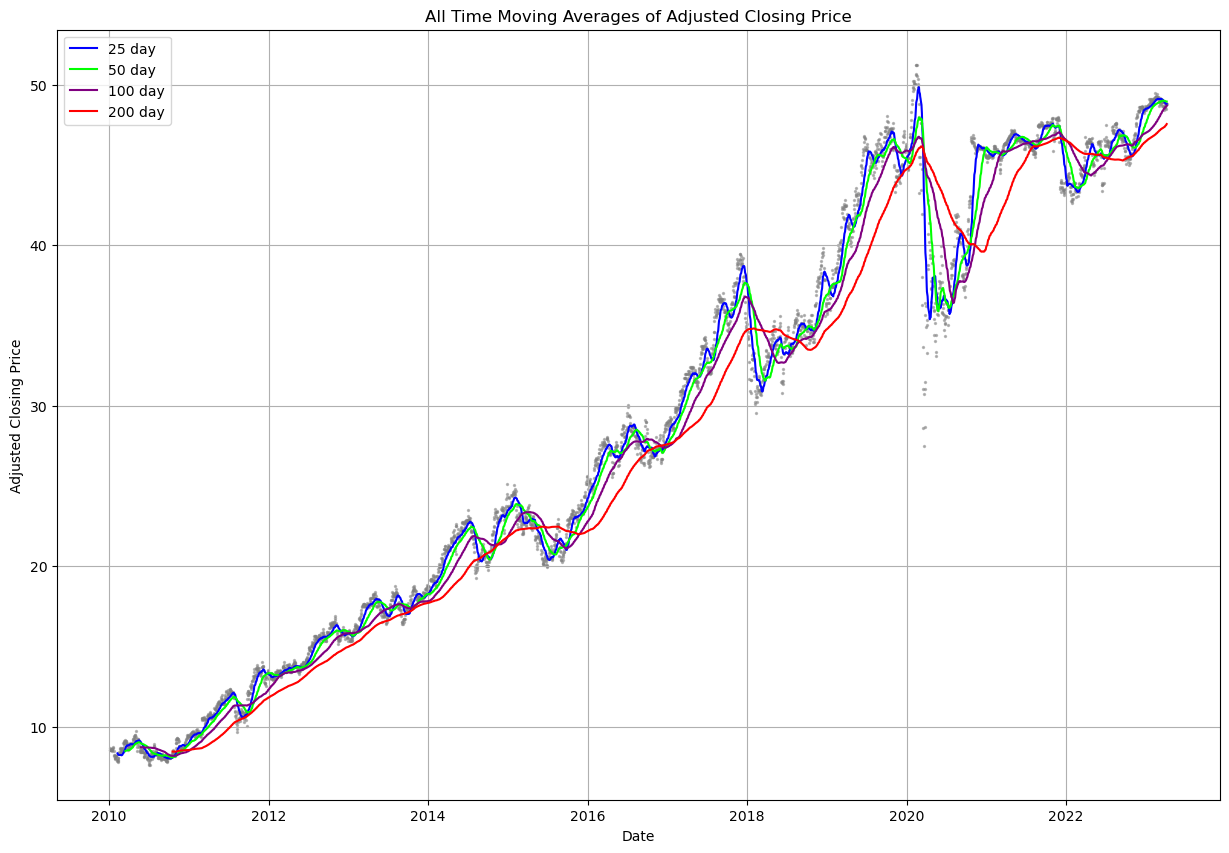

In [38]:
# plotting the moving averages on the same scatterplot
plt.figure(figsize=(15,10))
plt.plot(pnm.index, pnm['25DayMovAvg'], label = '25 day', c = 'blue')
plt.plot(pnm.index, pnm['50DayMovAvg'], label = '50 day', c = 'lime')
plt.plot(pnm.index, pnm['100DayMovAvg'], label = '100 day' , c = 'purple')
plt.plot(pnm.index, pnm['200DayMovAvg'], label = '200 day', c = 'red')
plt.scatter(pnm.index, pnm['Adj Close'], c='grey', s=2, alpha = 0.5)
plt.legend()
plt.title("All Time Moving Averages of Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid()

In [40]:
# showing the correlation values for each of the scatterplots for the moving averages
corr_10day = pnm["10DayMovAvg"].corr(pnm["Adj Close"])
corr_25day = pnm["25DayMovAvg"].corr(pnm["Adj Close"])
corr_50day = pnm["50DayMovAvg"].corr(pnm["Adj Close"])
corr_100day = pnm["100DayMovAvg"].corr(pnm["Adj Close"])
corr_200day = pnm["200DayMovAvg"].corr(pnm["Adj Close"])
# print the correlation
print("All time correlation between 10 DAY moving average and adjusted close:", corr_10day)
print("All time correlation between 25 DAY moving average and adjusted close:", corr_25day)
print("All time correlation between 50 DAY moving average and adjusted close:", corr_50day)
print("All time correlation between 100 DAY moving average and adjusted close:", corr_100day)
print("All time correlation between 200 DAY moving average and adjusted close:", corr_200day)

All time correlation between 10 DAY moving average and adjusted close: 0.9983596868626814
All time correlation between 25 DAY moving average and adjusted close: 0.99567024278077
All time correlation between 50 DAY moving average and adjusted close: 0.9928139544889014
All time correlation between 100 DAY moving average and adjusted close: 0.9880839558926131
All time correlation between 200 DAY moving average and adjusted close: 0.9788320234381052


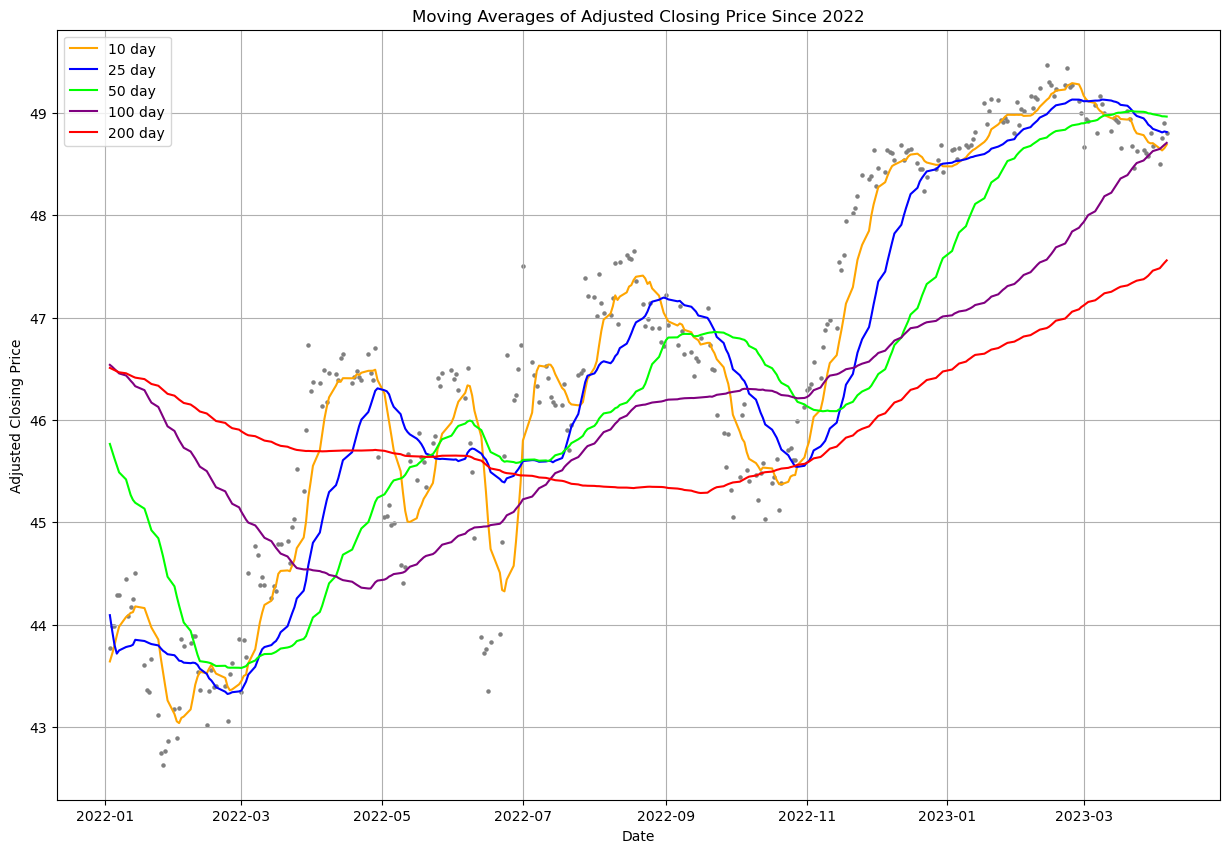

In [41]:
# making a plot of the moving averages of the adjusted closing prices since 2022
pnm_year = pnm[pnm.index.year >= 2022]
plt.figure(figsize=(15,10))
plt.plot(pnm_year.index, pnm_year['10DayMovAvg'], label = '10 day', c = 'orange')
plt.plot(pnm_year.index, pnm_year['25DayMovAvg'], label = '25 day', c = 'blue')
plt.plot(pnm_year.index, pnm_year['50DayMovAvg'], label = '50 day', c = 'lime')
plt.plot(pnm_year.index, pnm_year['100DayMovAvg'], label = '100 day' , c = 'purple')
plt.plot(pnm_year.index, pnm_year['200DayMovAvg'], label = '200 day', c = 'r')
plt.scatter(pnm_year.index, pnm_year['Adj Close'], c='grey', s=5, alpha = 1)
plt.legend()
plt.title("Moving Averages of Adjusted Closing Price Since 2022")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid()

In [42]:
# showing the correlation values for the moving averages of adjusted closing price
corr_10day = pnm_year["10DayMovAvg"].corr(pnm_year["Adj Close"])
corr_25day = pnm_year["25DayMovAvg"].corr(pnm_year["Adj Close"])
corr_50day = pnm_year["50DayMovAvg"].corr(pnm_year["Adj Close"])
corr_100day = pnm_year["100DayMovAvg"].corr(pnm_year["Adj Close"])
corr_200day = pnm_year["200DayMovAvg"].corr(pnm_year["Adj Close"])
# print the correlation
print("Correlation between 10 DAY moving average and adjusted close since 2022:", corr_10day)
print("Correlation between 25 DAY moving average and adjusted close since 2022:", corr_25day)
print("Correlation between 50 DAY moving average and adjusted close since 2022:", corr_50day)
print("Correlation between 100 DAY moving average and adjusted close since 2022:", corr_100day)
print("Correlation between 200 DAY moving average and adjusted close since 2022:", corr_200day)

Correlation between 10 DAY moving average and adjusted close since 2022: 0.9610754939337237
Correlation between 25 DAY moving average and adjusted close since 2022: 0.9214606601311248
Correlation between 50 DAY moving average and adjusted close since 2022: 0.8279465107104387
Correlation between 100 DAY moving average and adjusted close since 2022: 0.6724220705019903
Correlation between 200 DAY moving average and adjusted close since 2022: 0.4784395818227308


In [43]:
# adding moving average error for each of the moving averages for adjusted closing price
pnm["10DayMovAvgError"] = abs((pnm["10DayMovAvg"] - pnm["Adj Close"]) / pnm["Adj Close"]) * 100
pnm["25DayMovAvgError"] = abs((pnm["25DayMovAvg"] - pnm["Adj Close"]) / pnm["Adj Close"]) * 100
pnm["50DayMovAvgError"] = abs((pnm["50DayMovAvg"] - pnm["Adj Close"]) / pnm["Adj Close"]) * 100
pnm["100DayMovAvgError"] = abs((pnm["100DayMovAvg"] - pnm["Adj Close"]) / pnm["Adj Close"]) * 100
pnm["200DayMovAvgError"] = abs((pnm["200DayMovAvg"] - pnm["Adj Close"]) / pnm["Adj Close"]) * 100
pnm.head()

,Open,High,Low,Close,Adj Close,Volume,10DayMovAvg,25DayMovAvg,50DayMovAvg,100DayMovAvg,200DayMovAvg,10DayMovAvgError,25DayMovAvgError,50DayMovAvgError,100DayMovAvgError,200DayMovAvgError
Date,,,,,,,,,,,,,,,,
2010-01-04,12.75,12.95,12.63,12.71,8.673463,714500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,12.76,12.81,12.33,12.50,8.530157,1086400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,12.53,12.68,12.47,12.54,8.557454,688000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,12.51,12.62,12.43,12.52,8.543805,350400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,12.52,12.59,12.44,12.57,8.577926,350500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Percent Error (%)')

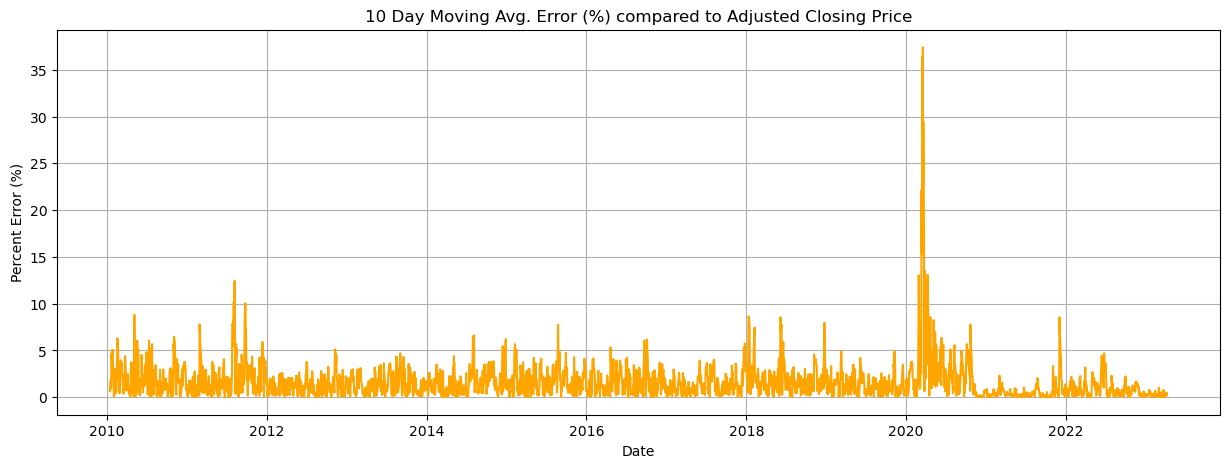

In [44]:
# 10 day moving average % error figure
plt.figure(figsize=(15, 5))
plt.plot(pnm.index, pnm['10DayMovAvgError'], label='25 day error', c = 'orange')
plt.grid()
plt.title("10 Day Moving Avg. Error (%) compared to Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Percent Error (%)")

In [46]:
# showing the quantitative description of the data plotted above
pnm['10DayMovAvgError'].describe()

count    3329.000000
mean        1.629098
std         1.968263
min         0.000002
25%         0.490521
50%         1.159493
75%         2.182093
max        37.417281
Name: 10DayMovAvgError, dtype: float64

Text(0, 0.5, 'Percent Error (%)')

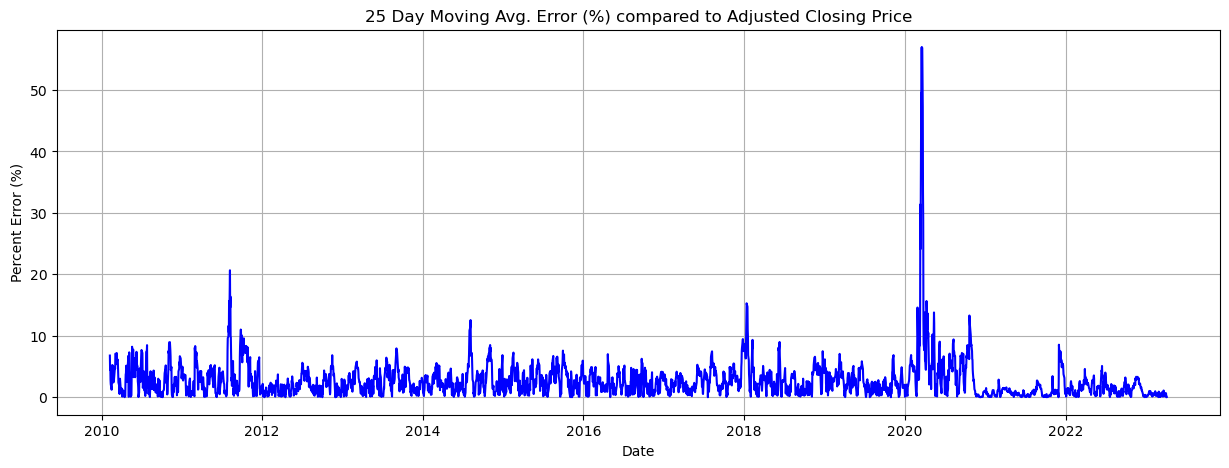

In [47]:
# 25 day moving average % error figure
plt.figure(figsize=(15, 5))
plt.plot(pnm.index, pnm['25DayMovAvgError'], label='25 day error', c = 'blue')
plt.grid()
plt.title("25 Day Moving Avg. Error (%) compared to Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Percent Error (%)")

In [48]:
# showing the quantitative description of the data plotted above
pnm['25DayMovAvgError'].describe()

count    3314.000000
mean        2.669462
std         3.147939
min         0.002440
25%         0.894591
50%         1.997367
75%         3.635207
max        56.961125
Name: 25DayMovAvgError, dtype: float64

Text(0, 0.5, 'Percent Error (%)')

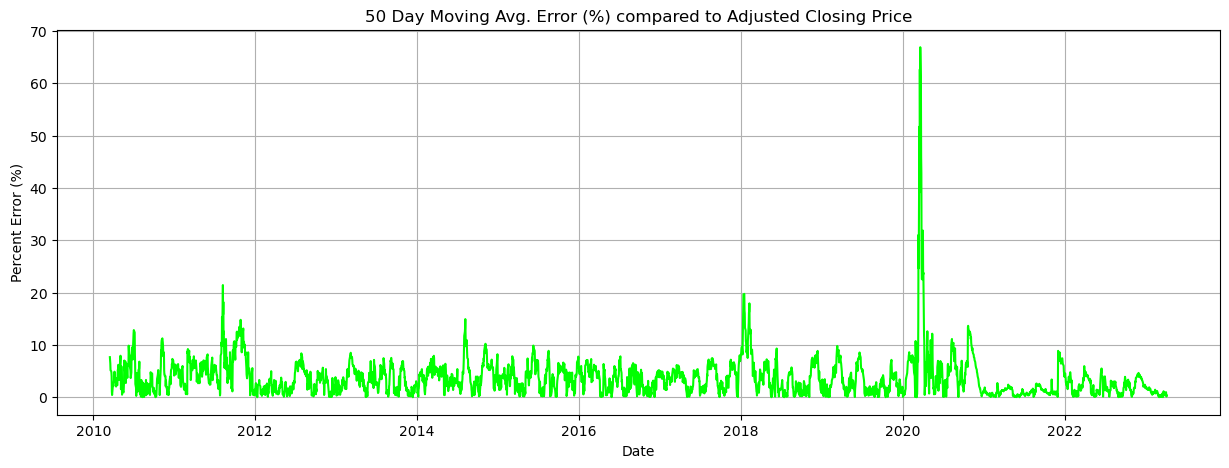

In [52]:
# 50 day moving average % error figure
plt.figure(figsize=(15, 5))
plt.plot(pnm.index, pnm['50DayMovAvgError'], label='50 day error', c = 'lime')
plt.grid()
plt.title("50 Day Moving Avg. Error (%) compared to Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Percent Error (%)")

In [53]:
# showing the quantitative description of the data plotted above
pnm['50DayMovAvgError'].describe()

count    3289.000000
mean        3.712989
std         3.917644
min         0.002935
25%         1.340466
50%         2.979174
75%         5.176428
max        66.899216
Name: 50DayMovAvgError, dtype: float64

Text(0, 0.5, 'Percent Error (%)')

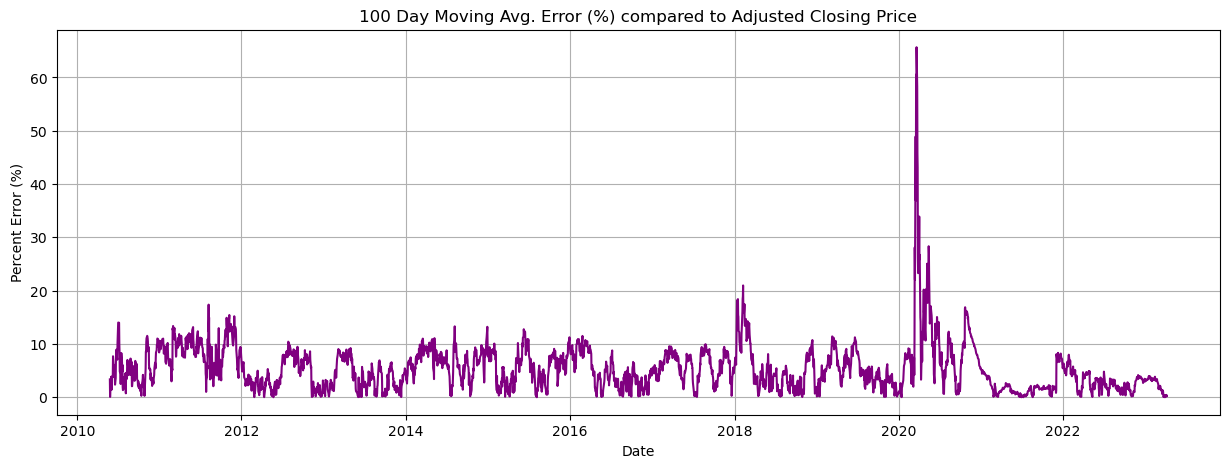

In [55]:
# 100 day moving average % error figure
plt.figure(figsize=(15, 5))
plt.plot(pnm.index, pnm['100DayMovAvgError'], label='100 day error', c = 'purple')
plt.grid()
plt.title("100 Day Moving Avg. Error (%) compared to Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Percent Error (%)")

In [56]:
# showing the quantitative description of the data plotted above
pnm['100DayMovAvgError'].describe()

count    3239.000000
mean        5.363068
std         4.483947
min         0.000206
25%         2.210642
50%         4.545045
75%         7.721597
max        65.664937
Name: 100DayMovAvgError, dtype: float64

Text(0, 0.5, 'Percent Error (%)')

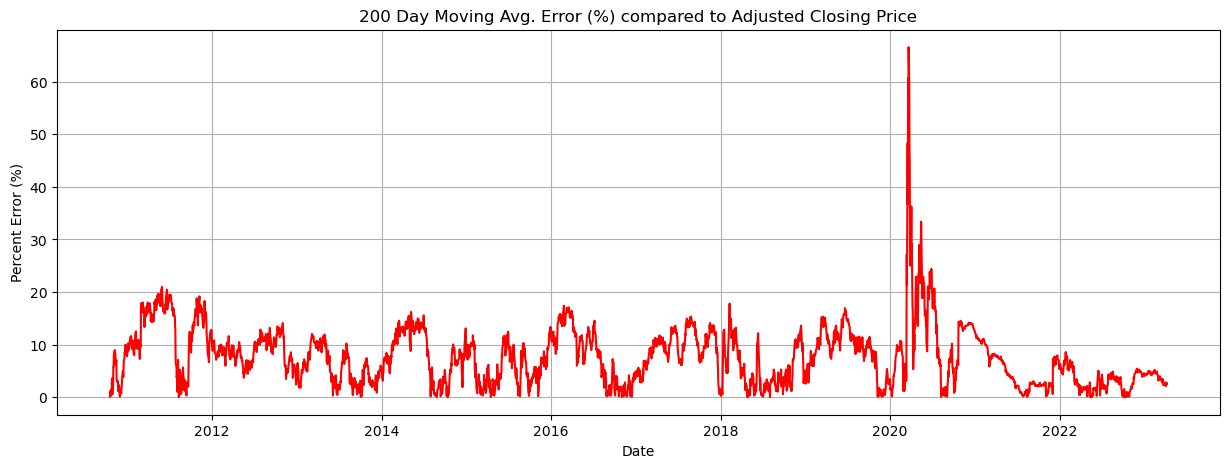

In [57]:
# 200 day moving average % error figure
plt.figure(figsize=(15, 5))
plt.plot(pnm.index, pnm['200DayMovAvgError'], label='200 day error', c = 'red')
plt.grid()
plt.title("200 Day Moving Avg. Error (%) compared to Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Percent Error (%)")

In [58]:
# showing the quantitative description of the data plotted above
pnm['200DayMovAvgError'].describe()

count    3139.000000
mean        7.677191
std         5.579549
min         0.004178
25%         3.176881
50%         7.226677
75%        10.936551
max        66.527167
Name: 200DayMovAvgError, dtype: float64

### Models that we expect to use

The problem at hand is clearly a regression problem. Though Volume is an important factor in our data, and it may impact how we handle certain observations from the stock ticker, we are mainly looking at a continuous numerical variable relating to the price of the stock based on historical data (either **Open** or **Adj Close** price).

We plan to utilize the **Prophet Algorithm**, which is used for time-series forecasting, to attempt to predict the future prices of a handful of stocks.

_Reference: https://peerj.com/preprints/3190/_

### What we hope to learn from this project

Overall, we are interested in learning if stock market trends can be forecasted by a machine learning model. We are hoping to test some different models, compare their effectiveness at predicting certain stock ticker prices, and try to make some general predictions about these stocks for the future. Essentially, we are trying to find some sense and predictability in stock market trends which has become an infamously tricky challenge for many. We forsee some challenges with fitting our model to data that does not represent a clear linear trend over long periods of time, but we intend to learn about the tools in the **yfinance** and **prophet** packages to steer us in the right direction.